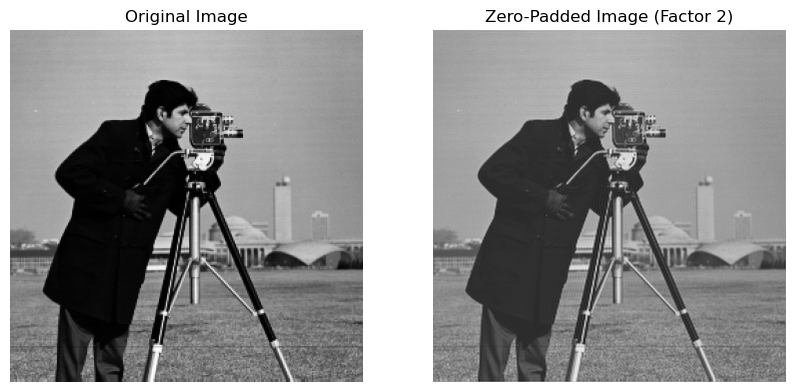

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftshift, fft2, ifft2, ifftshift

def zero_padding(I, factor):
    # Compute the Fourier transform of the image
    F = fftshift(fft2(I))
    
    # Upscale the Fourier transform by adding extra zeros
    height, width = I.shape
    new_height = int(height * factor)
    new_width = int(width * factor)
    
    padded_F = np.zeros((new_height, new_width), dtype=np.complex128)
    padded_F[(new_height - height) // 2:(new_height + height) // 2, 
             (new_width - width) // 2:(new_width + width) // 2] = factor**2 * F
    
    # Inverse Fourier transform
    I_zeropad = np.real(ifft2(ifftshift(padded_F)))
    
    return I_zeropad

# Example usage:
# Load an example image
I = plt.imread("cameraman.png")  # Replace "example_image.jpg" with your image file path

# Resize the image by zero padding with a factor of 2
factor = 2
I_zeropad = zero_padding(I, factor)

# Display the original and zero-padded images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(I, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')
axes[1].imshow(I_zeropad, cmap='gray')
axes[1].set_title("Zero-Padded Image (Factor {})".format(factor))
axes[1].axis('off')
plt.show()
